In [1]:
import sys, warnings, time, os, copy, gc, re, random, pickle#, cudf
warnings.filterwarnings('ignore')
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from pandas.io.json import json_normalize
from pprint import pprint
from pathlib import Path
from tqdm import tqdm
tqdm.pandas()
from collections import Counter
from datetime import datetime, timedelta
#import cudf

from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
customers = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/customers.csv')

# customers dataset processing

In [3]:
customers = customers.drop(['postal_code'], axis=1)
customers_col = list(customers.columns)

customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace({np.nan :0,'NONE':0, 'None':0, 'Monthly':1, 'Regularly':2})
customers['club_member_status'] = customers['club_member_status'].replace({np.nan :0, 'PRE-CREATE':1, 'ACTIVE':2, 'LEFT CLUB':-1})
customers['age'].fillna(int((customers['age'].mean())), inplace=True)
customers['FN'] = customers['FN'].fillna(0)
customers['Active'] = customers['Active'].fillna(0)


In [4]:
usecol = ['club_member_status', 'fashion_news_frequency', 'age', 'FN', 'Active']
predcol = ['customer_id']

# clustering the customers

In [5]:
def clustering(df, predcol, usecol, clusters=12):

    X = np.array(df[usecol])

#     norming numbers
    nm = preprocessing.StandardScaler()
    X = nm.fit_transform(X)

            #km = KMeans(n_clusters=clusters, random_state=2022)
    km = KMeans(n_clusters=clusters, 
                init='k-means++', 
                random_state=2022)
    km.fit(X)
    distortion = km.inertia_

    pred = km.labels_
    df_pred = pd.DataFrame(pred, columns=['pred'])
    df_pred = pd.concat([df, df_pred], axis=1)

    df_norm = pd.DataFrame(X, columns=usecol)
    #print(df_norm.describe())
    
    return df_pred, distortion

In [6]:
distortions = []
kx = []
for k in range(1,12):
    print(f'---- K = {k} ----')
    dfCustomers, dist = clustering(customers, predcol=predcol, usecol=usecol, clusters=k)
    distortions.append(dist)
    kx.append(k)

---- K = 1 ----
---- K = 2 ----
---- K = 3 ----
---- K = 4 ----
---- K = 5 ----
---- K = 6 ----
---- K = 7 ----
---- K = 8 ----
---- K = 9 ----
---- K = 10 ----
---- K = 11 ----


<function matplotlib.pyplot.show(close=None, block=None)>

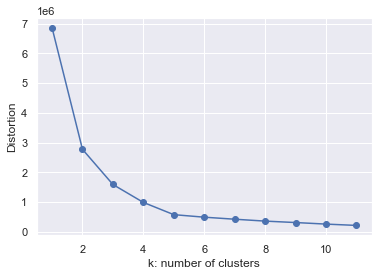

In [7]:
# Elbow method
plt.plot(kx, distortions)
plt.scatter(kx, distortions)
plt.xlabel("k: number of clusters")
plt.ylabel("Distortion")
plt.show

In [8]:
K_NUMBER = 5

In [9]:
dfCustomers, dist = clustering(customers,predcol=predcol, usecol=usecol, clusters=K_NUMBER)

In [10]:
dfCustomers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,pred
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,2,0,49.0,0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,2,0,25.0,2
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,2,0,24.0,2
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,2,0,54.0,0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,2,2,52.0,1
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,2,0,24.0,2
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,2,0,21.0,2
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,2,2,21.0,3
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,2,2,18.0,3


In [20]:
# listBin = [10, 19, 29, 39, 49, 59, 69, 119]
# dfCustomers['age_bins'] = pd.cut(dfCustomers['age'], listBin)

In [21]:
# pd.crosstab(dfCustomers['pred'], dfCustomers['age_bins'])

age_bins,"(10, 19]","(19, 29]","(29, 39]","(39, 49]","(49, 59]","(59, 69]","(69, 119]"
pred,,,,,,,
0,0,0,0,114371,123816,37125,9441
1,0,0,97,72593,83971,30095,8256
2,44090,325877,147234,0,0,0,0
3,26201,179593,75299,0,0,0,0
4,1292,22888,27299,17154,18455,5403,1430


In [23]:
# dfCustomers = dfCustomers.drop(['age_bins'], axis=1)

# transaction dataset

In [11]:
dfTransactions = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/transactions_train.csv',  
                               usecols=['t_dat', 'customer_id', 'article_id'],
                               dtype={'article_id': 'int32', 'customer_id': 'string'})
dfTransactions['t_dat'] = pd.to_datetime(dfTransactions['t_dat'])
dfTransactions.set_index('t_dat', inplace=True)
dfTransactions.head()

,customer_id,article_id
t_dat,,
2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001
2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003
2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004


In [16]:
listUniBins = dfCustomers['pred'].sort_values().unique().tolist()
print(listUniBins)

[0, 1, 2, 3, 4]


In [17]:
df_org  = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project\AI_project_data/transactions_train.csv',
                        usecols= ['t_dat', 'customer_id', 'article_id'], 
                        dtype={'article_id': 'int32', 't_dat': 'string', 'customer_id': 'string'}) 

# popularity recommendation

In [78]:

N= 12 

for uniBin in listUniBins:
    df = df_org.copy()

    # segmantation data by kmeans 
    if str(uniBin) == 'nan':
        dfCustomersTemp = dfCustomers[dfCustomers['pred'].isnull()]
    else:
        dfCustomersTemp = dfCustomers[dfCustomers['pred'] == uniBin]
    dfCustomersTemp = dfCustomersTemp.drop(['pred'], axis=1)
    #dfCustomersTemp = pd.from_pandas(dfCustomersTemp)
    
    #
    
    df = df.merge(dfCustomersTemp[['customer_id', 'age']], on='customer_id', how='inner')
    print(f'The shape of scope transaction for {uniBin} is {df.shape}. \n')

    #
    
    df['customer_id'] = df['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
    
    df['t_dat'] = pd.to_datetime(df['t_dat'])
    last_ts = df['t_dat'].max()
    tmp = df[['t_dat']].copy()
    tmp['dow'] = tmp['t_dat'].dt.dayofweek
#     previous Tuesday
    tmp['ldbw'] = tmp['t_dat'] - pd.TimedeltaIndex(tmp['dow'] - 1, unit='D')
#   next Tuesday is calculated  
    tmp.loc[tmp['dow'] >=2 , 'ldbw'] = tmp.loc[tmp['dow'] >=2 , 'ldbw'] + pd.TimedeltaIndex(np.ones(len(tmp.loc[tmp['dow'] >=2])) * 7, unit='D')
    df['ldbw'] = tmp['ldbw'].values
#     so basically here we count purchase of articles in each Tuesday
#     popularity of items without customer information
    weekly_sales = df.drop('customer_id', axis=1).groupby(['ldbw', 'article_id']).count().reset_index()
    weekly_sales = weekly_sales.rename(columns={'t_dat': 'count'})
    
    df = df.merge(weekly_sales, on=['ldbw', 'article_id'], how = 'left')
    
    weekly_sales = weekly_sales.reset_index().set_index('article_id')

#     count_targ is amount of last day purchased    
    df = df.merge(
        weekly_sales.loc[weekly_sales['ldbw']==last_ts, ['count']],
        on='article_id', suffixes=("", "_targ"))

    df['count_targ'].fillna(0, inplace=True)
    del weekly_sales
    
    
    df['quotient'] = df['count_targ'] / df['count']
    
    
    target_sales = df.drop('customer_id', axis=1).groupby('article_id')['quotient'].sum()
    general_pred = target_sales.nlargest(N).index.tolist()
    general_pred = ['0' + str(article_id) for article_id in general_pred]
    general_pred_str =  ' '.join(general_pred)
    del target_sales
    
    purchase_dict = {}

    #tmp = df.copy().to_pandas()
    tmp = df.copy()
    tmp['x'] = ((last_ts - tmp['t_dat']) / np.timedelta64(1, 'D')).astype(int)
    
    tmp['dummy_1'] = 1 
    tmp['x'] = tmp[["x", "dummy_1"]].max(axis=1)
    
# a weight is considered in a way that older purchases worth less

    a, b, c, d = 2.5e4, 1.5e5, 2e-1, 1e3
    tmp['y'] = a / np.sqrt(tmp['x']) + b * np.exp(-c*tmp['x']) - d
    
# wight are multiplied by qoutients and then aggregated for each customer and article
    tmp['dummy_0'] = 0 
    tmp['y'] = tmp[["y", "dummy_0"]].max(axis=1)
    tmp['value'] = tmp['quotient'] * tmp['y'] 
    tmp = tmp.groupby(['customer_id', 'article_id']).agg({'value': 'sum'})
    tmp = tmp.reset_index()
    
# we rank the value and then 12 highest ranks are chosen

    tmp = tmp.loc[tmp['value'] > 0]
    tmp['rank'] = tmp.groupby("customer_id")["value"].rank("dense", ascending=False)
    tmp = tmp.loc[tmp['rank'] <= 12]
    
# values are sorted for each customer

    purchase_df = tmp.sort_values(['customer_id', 'value'], ascending = False).reset_index(drop = True)
    purchase_df['prediction'] = '0' + purchase_df['article_id'].astype(str) + ' '
    purchase_df = purchase_df.groupby('customer_id').agg({'prediction': sum}).reset_index()
    purchase_df['prediction'] = purchase_df['prediction'].str.strip()
    purchase_df = pd.DataFrame(purchase_df)


    sub  = pd.read_csv('C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project/AI_project_data/sample_submission.csv',
                            usecols= ['customer_id'], 
                            dtype={'customer_id': 'string'})
    
    numCustomers = sub.shape[0]
    
    sub = sub.merge(dfCustomersTemp[['customer_id', 'age']], on='customer_id', how='inner')

    sub['customer_id2'] = sub['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
    #sub['customer_id2'] = sub['customer_id'].str[-16:].str.hex_to_int().astype('int64')

    sub = sub.merge(purchase_df, left_on = 'customer_id2', right_on = 'customer_id', how = 'left',
                   suffixes = ('', '_ignored'))

    #sub = sub.to_pandas()
    sub['prediction'] = sub['prediction'].fillna(general_pred_str)
    sub['prediction'] = sub['prediction'] + ' ' +  general_pred_str
    sub['prediction'] = sub['prediction'].str.strip()
    sub['prediction'] = sub['prediction'].str[:131]
    sub = sub[['customer_id', 'prediction']]
    sub.to_csv(f'submission_' + str(uniBin) + '.csv',index=False)
    print(f'Saved prediction for {uniBin}. The shape is {sub.shape}. \n')
    print('-'*50)
print('Finished.\n')
print('='*50)


The shape of scope transaction for 0 is (5804798, 4). 

Saved prediction for 0. The shape is (284753, 2). 

--------------------------------------------------
The shape of scope transaction for 1 is (5293183, 4). 

Saved prediction for 1. The shape is (195012, 2). 

--------------------------------------------------
The shape of scope transaction for 2 is (11598739, 4). 

Saved prediction for 2. The shape is (517201, 2). 

--------------------------------------------------
The shape of scope transaction for 3 is (8169510, 4). 

Saved prediction for 3. The shape is (281093, 2). 

--------------------------------------------------
The shape of scope transaction for 4 is (681783, 4). 

Saved prediction for 4. The shape is (93921, 2). 

--------------------------------------------------
Finished.



# submission

In [81]:
for i, uniBin in enumerate(listUniBins):
    dfTemp  = pd.read_csv(f'submission_' + str(uniBin) + '.csv')
    if i == 0:
        dfSub = dfTemp
    else:
        dfSub = pd.concat([dfSub, dfTemp], axis=0)

assert dfSub.shape[0] == numCustomers, f'The number of dfSub rows is not correct. {dfSub.shape[0]} vs {numCustomers}.'

dfSub.to_csv(f'C:/Users/SepidehHabibiabad/OneDrive - C-Clear Partners BVBA/Desktop/AI project/submission.csv', index=False)
print(f'Saved submission.csv.')

Saved submission.csv.
